In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import spin_package.ising_fixed_e as ising_e
import spin_package.ising_fixed_T as ising_T
from scipy.optimize import root_scalar, root

%load_ext autoreload
%autoreload 2

alpha_m = root(
        lambda x: 2*x + 1 - np.exp(x), 1
    ).x[0]
alpha_e = np.exp(alpha_m)/np.sqrt(8*alpha_m)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
ps = np.unique(np.logspace(0.5,4.5,200,dtype=int))

In [4]:
ess = np.empty(len(ps))
mss = np.empty(len(ps))
n_points_m = 50_000
for i,p in enumerate(tqdm(ps)):
    if (p==3): 
        ess[i] = root_scalar(ising_e.find_minimum_entropy, args=(p, n_points_m), bracket=[-0.9, 0]).root
        mss[i] = ising_e.find_minimum_entropy_m(ess[i], p, n_points_m)
    else: 
        ess[i] = root_scalar(ising_e.find_minimum_entropy, args=(p, n_points_m), bracket=[-0.81, 0]).root
        mss[i] = ising_e.find_minimum_entropy_m(ess[i], p, n_points_m)

  0%|          | 0/177 [00:00<?, ?it/s]

In [6]:
Tds = np.empty(len(ps))
for idx, p in enumerate(tqdm(ps)):
    Tds[idx] = ising_T.compute_Td(p)

  0%|          | 0/177 [00:00<?, ?it/s]

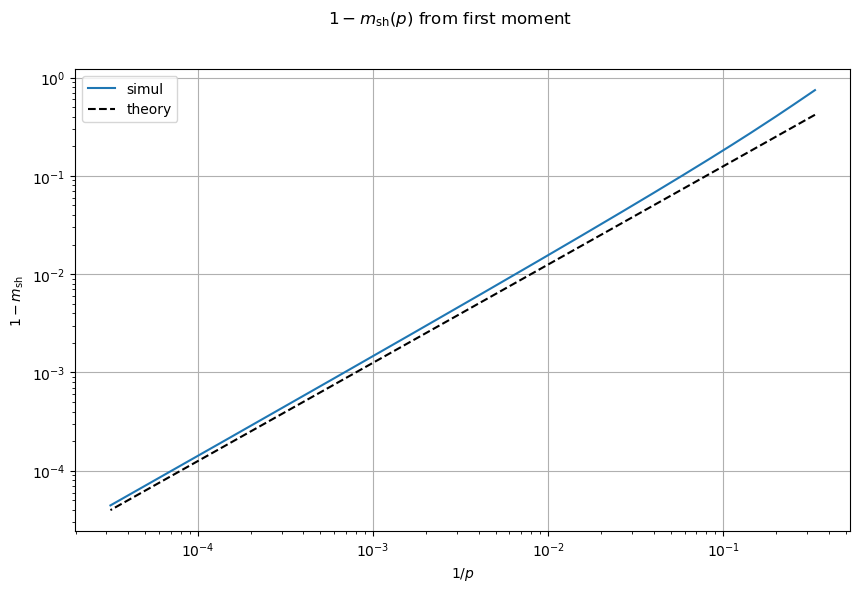

In [7]:
fig, ax = plt.subplots(figsize=(10,6))
fig.suptitle(r"$1 - m_{\rm sh}(p)$ from first moment")
ax.plot(1/ps, 1-mss, '-', label = "simul")
ax.plot(1/ps, alpha_m/ps, 'k--', label = "theory")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r"$1/p$")
ax.set_ylabel(r"$1 - m_{\rm sh}$")
plt.grid()
plt.legend()

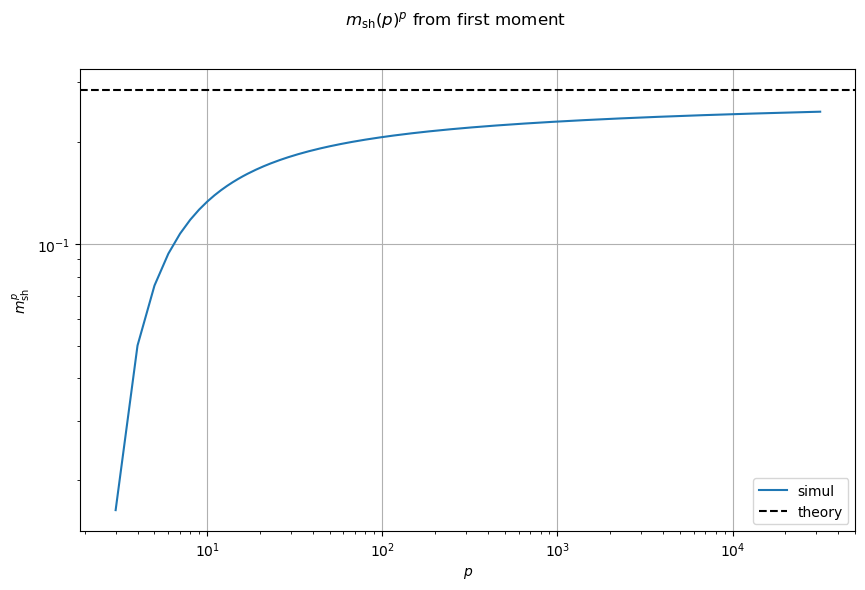

In [8]:
fig, ax = plt.subplots(figsize=(10,6))
fig.suptitle(r"$m_{\rm sh}(p)^p$ from first moment")
ax.plot(ps, mss**ps, '-', label = "simul")
ax.axhline(np.exp(-alpha_m), color='k', linestyle='--', label = "theory")
ax.set_xlabel(r"$p$")
ax.set_ylabel(r"$m_{\rm sh}^p$")
ax.set_xscale('log')
ax.set_yscale('log')
plt.grid()
plt.legend()

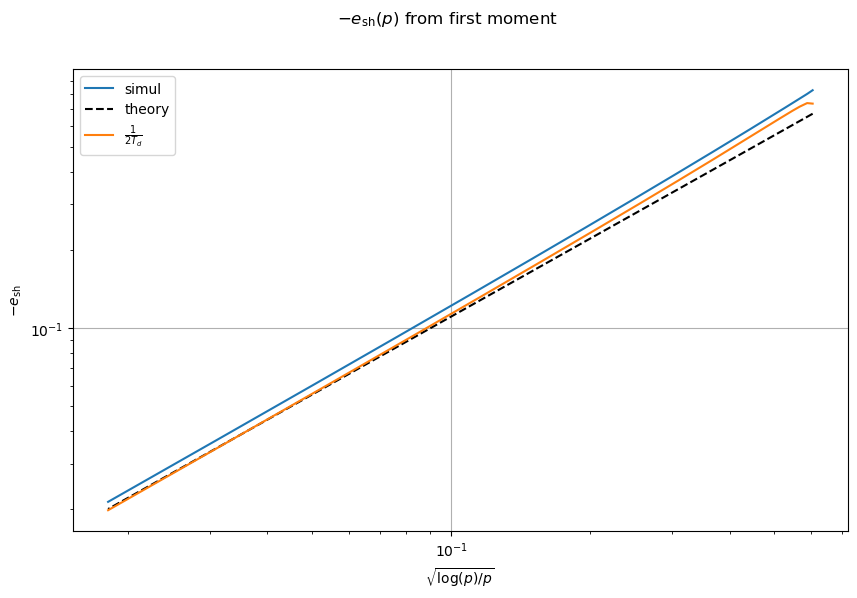

In [9]:
fig, ax = plt.subplots(figsize=(10,6))
fig.suptitle(r"$-e_{\rm sh}(p)$ from first moment")
ax.plot(np.sqrt(np.log(ps)/ps), -ess, '-', label = "simul")
ax.plot(np.sqrt(np.log(ps)/ps), alpha_e*np.sqrt(np.log(ps)/ps), 'k--', label = "theory")
ax.plot(np.sqrt(np.log(ps)/ps), 1/(2*Tds), '-', label = r"$\frac{1}{2T_d}$")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r"$\sqrt{\log(p)/p}$")
ax.set_ylabel(r"$-e_{\rm sh}$")
plt.grid()
plt.legend()